Mounted at /content/drive
User Details Preview:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  

Cooking Sessions Preview:
  Session ID User ID        Dish Name  Meal Type     Session Start  \
0       S001    U001        Spaghetti     Dinner  2024-12-01 19:00  

<ipython-input-1-4ea3073baed1>:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_by_age_group = merged_data.groupby('Age Group')['Order ID'].count()
<ipython-input-1-4ea3073baed1>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='viridis')


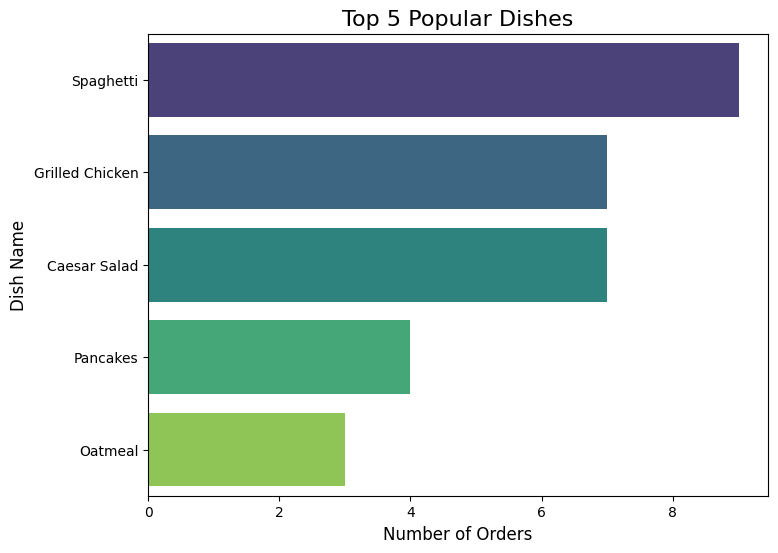

<ipython-input-1-4ea3073baed1>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_age_group.index, y=orders_by_age_group.values, palette='coolwarm')


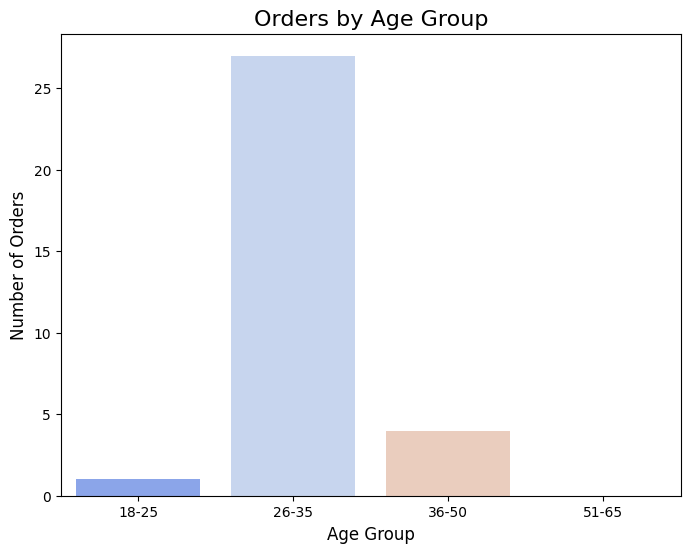

<ipython-input-1-4ea3073baed1>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_order_amount_location.values, y=total_order_amount_location.index, palette='mako')


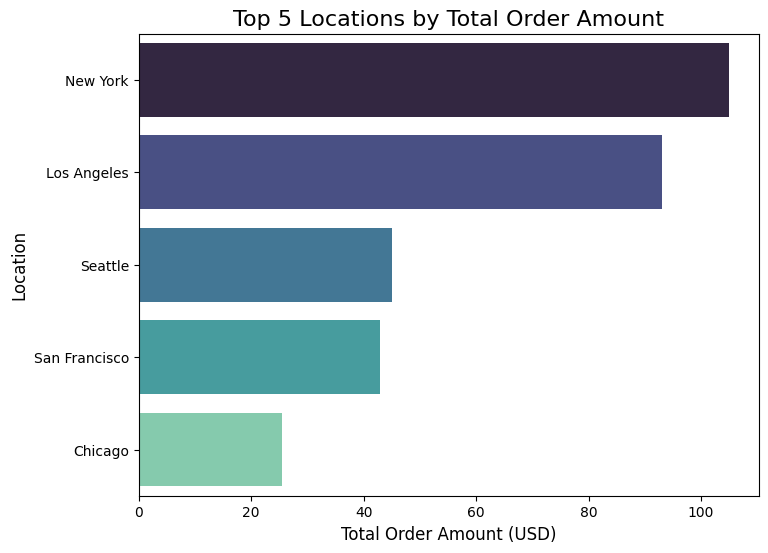


Recommendations saved to 'Recommendations.txt'


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive (if running in Colab)
from google.colab import drive
drive.mount('/content/drive')

# File Paths
user_details_path = '/content/drive/MyDrive/Colab Notebooks/USerDetails.csv'
cooking_sessions_path = '/content/drive/MyDrive/Colab Notebooks/CookingSessions.csv'
order_details_path = '/content/drive/MyDrive/Colab Notebooks/OrderDetails.csv'
output_cleaned_path = '/content/drive/MyDrive/Colab Notebooks/Merged_Cleaned_Dataset.csv'


# 1. Load Datasets

user_details = pd.read_csv(user_details_path)
cooking_sessions = pd.read_csv(cooking_sessions_path)
order_details = pd.read_csv(order_details_path)

print("User Details Preview:")
print(user_details.head())
print("\nCooking Sessions Preview:")
print(cooking_sessions.head())
print("\nOrder Details Preview:")
print(order_details.head())

# 2. Data Cleaning

# Cleaning UserDetails
user_details = user_details.drop_duplicates().dropna()

# Cleaning CookingSessions
cooking_sessions = cooking_sessions.drop_duplicates().dropna()

# Cleaning OrderDetails
order_details = order_details.drop_duplicates().dropna()

merged_data = pd.merge(user_details, cooking_sessions, on='User ID', how='inner')

# Merge the result with OrderDetails
merged_data = pd.merge(merged_data, order_details, on='User ID', how='inner')

# Save cleaned and merged data
merged_data.to_csv(output_cleaned_path, index=False)

print("\nMerged Dataset Preview:")
print(merged_data.head())

# 4. Analysis

# 1. Top 5 Popular Dishes
popular_dishes = merged_data['Dish Name_x'].value_counts().head(5)

# 2. Orders by Age Group
merged_data['Age Group'] = pd.cut(merged_data['Age'], bins=[18, 25, 35, 50, 65], labels=['18-25', '26-35', '36-50', '51-65'])
orders_by_age_group = merged_data.groupby('Age Group')['Order ID'].count()

# 3. Total Order Amount by Location
total_order_amount_location = merged_data.groupby('Location')['Amount (USD)'].sum().sort_values(ascending=False).head(5)

# 5. Visualizations
# Visualization 1: Top 5 Popular Dishes
plt.figure(figsize=(8, 6))
sns.barplot(x=popular_dishes.values, y=popular_dishes.index, palette='viridis')
plt.title('Top 5 Popular Dishes', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Dish Name', fontsize=12)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Top_5_Popular_Dishes.png')
plt.show()

# Visualization 2: Orders by Age Group
plt.figure(figsize=(8, 6))
sns.barplot(x=orders_by_age_group.index, y=orders_by_age_group.values, palette='coolwarm')
plt.title('Orders by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Orders_By_Age_Group.png')
plt.show()

# Visualization 3: Total Order Amount by Location
plt.figure(figsize=(8, 6))
sns.barplot(x=total_order_amount_location.values, y=total_order_amount_location.index, palette='mako')
plt.title('Top 5 Locations by Total Order Amount', fontsize=16)
plt.xlabel('Total Order Amount (USD)', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Top_Locations_By_Order_Amount.png')
plt.show()

# 6. Business Recommendations

recommendations = """
Business Recommendations:
1. Focus marketing efforts on the top 5 popular dishes as they attract the most orders.
2. Tailor promotions for the '26-35' age group, which appears to place the highest number of orders.
3. Invest in areas with high total order amounts to maximize revenue.
"""

# Save Recommendations to File
with open('/content/drive/MyDrive/Colab Notebooks/Recommendations.txt', 'w') as file:
    file.write(recommendations)

print("\nRecommendations saved to 'Recommendations.txt'")